In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


In [2]:
# READING DATA
dataFind = pd.read_csv("C:/Users/malle\Desktop/sem1 n 2/heart.csv")

In [3]:
dataFind.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


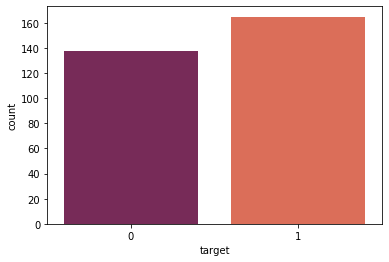

In [4]:
#python distribution library for plotting-seaborn

sea.countplot(x="target", data = dataFind, palette = "rocket")
plt.show()

In [5]:
#checking the percentage of patients suffering from heart disease

count_no_HeartDisease = len(dataFind[dataFind.target == 0])
count_yes_HeartDisease = len(dataFind[dataFind.target == 1])
print("% of Patients not having Heart Disease: {:.2f}%".format((count_no_HeartDisease / (len(dataFind.target))*100)))
print("% of Patients having Heart Disease: {:.2f}%".format((count_yes_HeartDisease / (len(dataFind.target))*100)))

% of Patients not having Heart Disease: 45.54%
% of Patients having Heart Disease: 54.46%


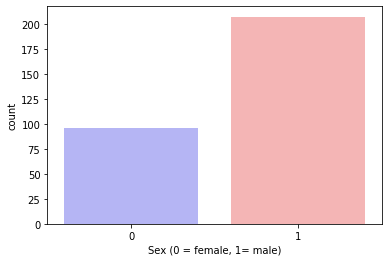

In [6]:
#plotting the count of males and females 

sea.countplot(x='sex', data=dataFind, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

###### Counting the number of patients

In [7]:
count_numofFemale = len(dataFind[dataFind.sex == 0])
count_numofMale = len(dataFind[dataFind.sex == 1])
print("Female Patients: {:.2f}".format((count_numofFemale / (len(dataFind.sex)))))
print("male Patients: {:.2f}".format((count_numofMale / (len(dataFind.sex)))))

Female Patients: 0.32
male Patients: 0.68


In [8]:
#calculating the mean of all the values

dataFind.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


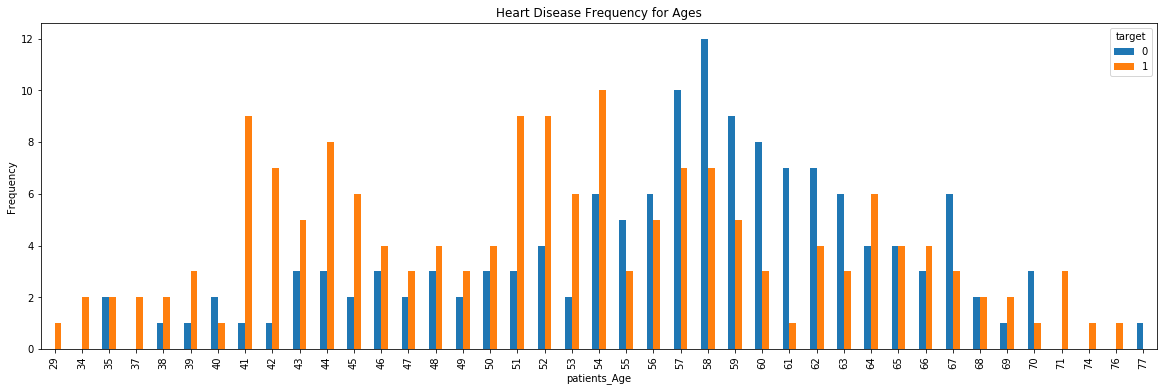

In [9]:

#plot against frequency of heart disease and age


pd.crosstab(dataFind.age,dataFind.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('patients_Age')
plt.ylabel('Frequency')
plt.show()

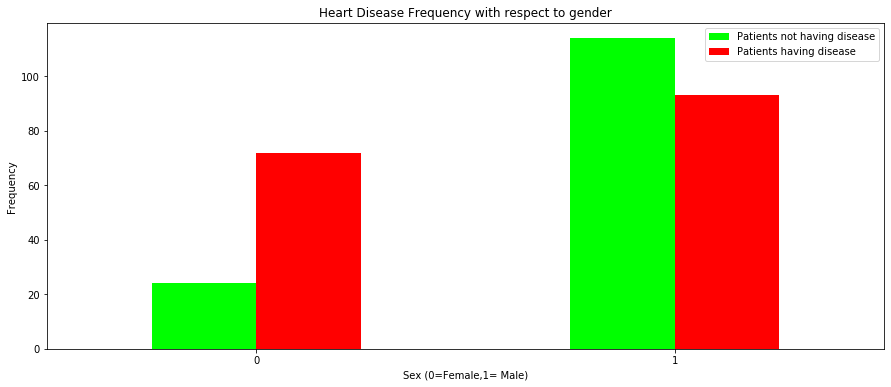

In [10]:
#plot against gender and frequency of getting heart disease



pd.crosstab(dataFind.sex,dataFind.target).plot(kind="bar",figsize=(15,6),color=['#00ff00','#ff0000' ])
plt.title('Heart Disease Frequency with respect to gender')
plt.xlabel('Sex (0=Female,1= Male)')
plt.xticks(rotation=0)
plt.legend(["Patients not having disease", "Patients having disease"])
plt.ylabel('Frequency')
plt.show()

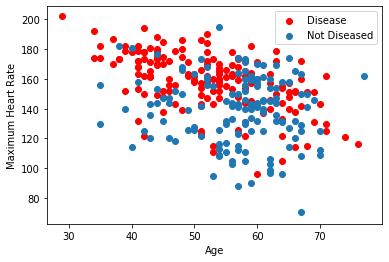

In [11]:
#maximum heart rate for people who are diseased and who are not


plt.scatter(x=dataFind.age[dataFind.target==1], y=dataFind.thalach[(dataFind.target==1)], c="red")
plt.scatter(x=dataFind.age[dataFind.target==0], y=dataFind.thalach[(dataFind.target==0)])
plt.legend(["Disease", "Not Diseased"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

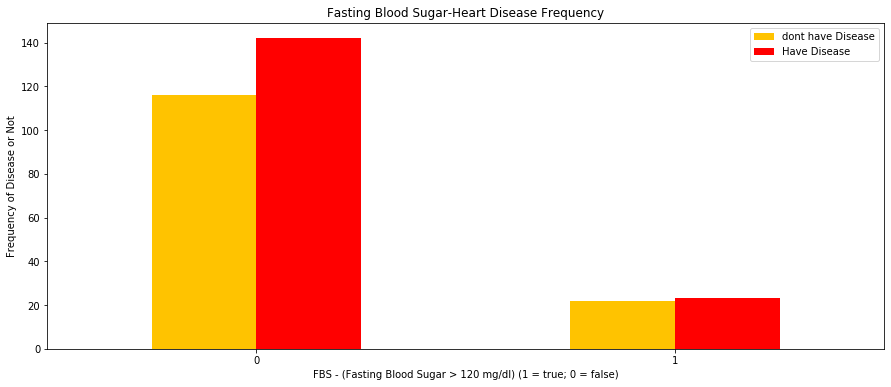

In [12]:
#plot against fasting blood sugar vs frequency of heart disease

pd.crosstab(dataFind.fbs,dataFind.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#ff0000' ])
plt.title('Fasting Blood Sugar-Heart Disease Frequency')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["dont have Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

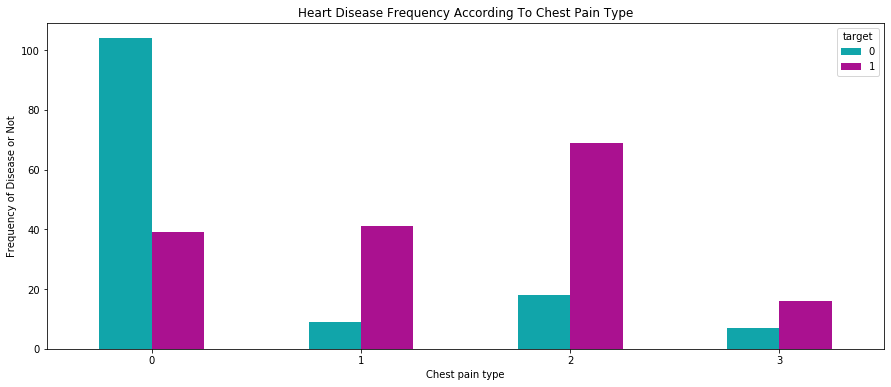

In [13]:
#plot against chest pain type and 

pd.crosstab(dataFind.cp,dataFind.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest pain type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

###### Creating Dummy Variable

In [14]:
i = pd.get_dummies(dataFind['cp'], prefix = "cp")
j = pd.get_dummies(dataFind['thal'], prefix = "thal")
k = pd.get_dummies(dataFind['slope'], prefix = "slope")

In [15]:
frames = [dataFind, i, j, k]
dataFind = pd.concat(frames, axis = 1)
dataFind.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [16]:
dataFind = dataFind.drop(columns = ['cp', 'thal', 'slope'])
dataFind.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


###### *Logistic Regression : Creating Model*

In [17]:
y = dataFind.target.values
x_data = dataFind.drop(['target'], axis = 1)

###### Normalization

In [18]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=5)

###### Transpose Matrices

In [20]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

###### Initialization

In [21]:
def initial(dim):
    
    wgt = np.full((dim,1),0.01)
    bs = 0.0
    return wgt,bs

###### Defining sigmoid

In [22]:
def sig(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

###### Defining forward & backward

In [23]:
def forback(wgt,bs,x_train,y_train):
    #Forward
    
    y_head = sig(np.dot(wgt.T,x_train) + bs)
    lost = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    costing = np.sum(lost) / x_train.shape[1]
    
    # Backward
    derive_wgt = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derive_bs = np.sum(y_head-y_train)/x_train.shape[1]
    grad = {"Derivative Weight" : derive_wgt, "Derivative Bias" : derive_bs}
    
    return costing ,grad

###### Updating weight and bias function

In [24]:
def upd(wgt,bs,x_train,y_train,learningRate,iteration) :
    cost_list = []
    number = []
    
    #for each iteration, update weight and bias values
    for x in range(iteration):
        costing,grad = forback(wgt,bs,x_train,y_train)
        wgt = wgt - learningRate * grad["Derivative Weight"]
        bs = bs - learningRate * grad["Derivative Bias"]
        
        cost_list.append(costing)
        number.append(x)

    param = {"weight": wgt,"bias": bs}
    
    print("iteration:",iteration)
    print("cost:",costing)

    plt.plot(number,cost_list)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return param, grad

###### Predicting function

In [25]:
def estimate(wgt,bs,x_test):
    z = np.dot(wgt.T,x_test) + bs
    y_head = sig(z)

    y_estimation = np.zeros((1,x_test.shape[1]))
    
    for a in range(y_head.shape[1]):
        if y_head[0,a] <= 0.5:
            y_estimation[0,a] = 0
        else:
            y_estimation[0,a] = 1
    return y_estimation

###### Defining logistic_regression

In [26]:
def log_reg(x_train,y_train,x_test,y_test,learningRate,iteration):
    dim = x_train.shape[0]
    wgt,bs = initial(dim)
    
    param, grad = upd(wgt,bs,x_train,y_train,learningRate,iteration)

    y_prediction = estimate(param["weight"],param["bias"],x_test)
    
    print("accuracy got after Manual Testing : {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.37303048862551


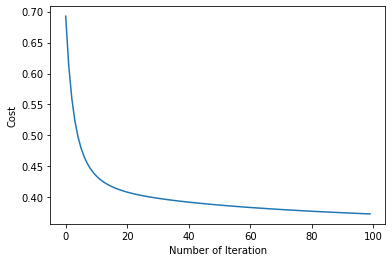

accuracy got after Manual Testing : 86.89%


In [27]:
log_reg(x_train,y_train,x_test,y_test,1,100)

###### SKLEARN LOGISTIC REGRESSION

In [28]:
#sklearn

accuracy = {}

logreg = LogisticRegression()
logreg.fit(x_train.T,y_train.T)
acc = logreg.score(x_test.T,y_test.T)*100

accuracy['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 90.16%


## K-Nearest Neighbour (KNN) Classification

2 NN Score: 80.33%


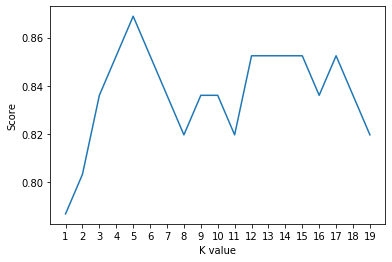

Maximum KNN Score is 86.89%


In [29]:
# K-Nearest Neighbour Model 

from sklearn.neighbors import KNeighborsClassifier as KNC
kneigh = KNC(n_neighbors = 2)  # n_neighbors means k
kneigh.fit(x_train.T, y_train.T)
prediction = kneigh.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, kneigh.score(x_test.T, y_test.T)*100))
scoreList = []
for i in range(1,20):
    kneigh2 = KNC(n_neighbors = i)  # n_neighbors means k
    kneigh2.fit(x_train.T, y_train.T)
    scoreList.append(kneigh2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracy['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))


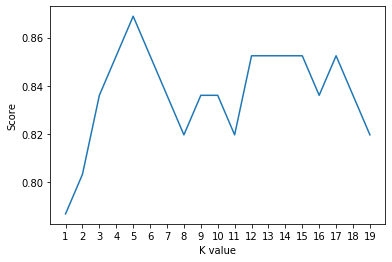

Maximum KNN Score is 86.89%


In [30]:
#trying to find best k value
scoreList = []
for i in range(1,20):
    kneigh2 = KNC(n_neighbors = i)  # n_neighbors means k
    kneigh2.fit(x_train.T, y_train.T)
    scoreList.append(kneigh2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracy['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## Naive Bayes Algorithm

In [31]:
## Naive Bayes Algorithm

a = dataFind.iloc[:, :-1].values
b = dataFind.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 5)

from sklearn.naive_bayes import GaussianNB as GNB
classifier = GNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix as CM
con_mat_test = CM(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
con_mat_train = CM(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((con_mat_train[0][0] + con_mat_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((con_mat_test[0][0] + con_mat_test[1][1])/len(y_test)))



Accuracy for training set for Naive Bayes = 0.9917355371900827
Accuracy for test set for Naive Bayes = 0.9672131147540983


## Random Forest Classification

In [32]:
#Random Forest Classification method

a = dataFind.iloc[:, :-1].values
b = dataFind.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 10)

from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC(n_estimators = 20)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix as CM
con_mat_test = CM(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
con_mat_train = CM(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((con_mat_train[0][0] + con_mat_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((con_mat_test[0][0] + con_mat_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.9836065573770492


###### Comparing Models

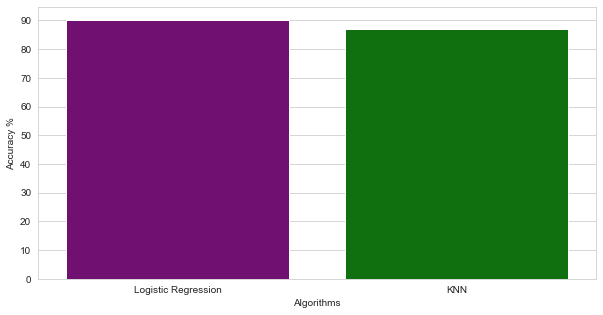

In [33]:
#Graph showing Comparison between the models
colors = ["purple", "green", "orange"]

sea.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sea.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()